In [1]:
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('the_big_df.csv', header = 0, sep = ',')

In [4]:
df.head()

,src_ip,dst_ip,src_port,dst_port,first_pkt_time,last_pkt_time,avg_hops,avg_packet_len,nodeRelatedMessages:HeartbeatRequest,nodeRelatedMessages:HeartbeatResponse,...,nodeRelatedMessages:SessionSetDeletionResponse,sessionRelatedMessages:SessionEstablishmentRequest,sessionRelatedMessages:SessionEstablishmentResponse,sessionRelatedMessages:SessionModificationRequest,sessionRelatedMessages:SessionModificationResponse,sessionRelatedMessages:SessionDeletionRequest,sessionRelatedMessages:SessionDeletionResponse,sessionRelatedMessages:SessionReportRequest,sessionRelatedMessages:SessionReportResponse,class
0,6003::1004,2000::100:502,8814,14608,1.603074e+09,1.603074e+09,190,230,0,15,...,0,4,63,301,149,30,32,182,135,0
1,14.173.200.75,6003::100a,40356,3120,1.603141e+09,1.603142e+09,190,161,8,3,...,0,13,46,420,459,16,11,63,28,1
2,99.173.254.198,190.170.118.18,48162,62144,1.603089e+09,1.603089e+09,190,130,0,3,...,0,80,14,412,385,143,51,1,144,1
3,6003::1002,6003::1002,14600,14605,1.603074e+09,1.603074e+09,190,231,3,8,...,0,57,30,365,528,14,33,22,124,0
4,6003::1005,2000::100:505,14603,8814,1.603074e+09,1.603075e+09,190,259,1,13,...,0,15,6,615,617,58,33,28,19,0


In [5]:
data = df.iloc[:, 6:-1] # data, without 'class' column
target = df.iloc[:, -1] #target, only 'class' column

In [6]:
X_train, X_test, Y_train, Y_test = \
    train_test_split(data, target, random_state=42, train_size=0.75)
assert X_train.shape[0] + X_test.shape[0] == df.shape[0]
print ("train size={}, test_size={}, total_size={}" \
       .format(X_train.shape[0], X_test.shape[0], df.shape[0]))

train size=750, test_size=250, total_size=1000


In [7]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
    
from sklearn.model_selection import GridSearchCV

In [8]:
labels = []
means = []

def create_lists(algorithm, accuracy):
    labels.append(algorithm)
    means.append(float('{:.2f}'.format(accuracy)))

In [9]:
log_model = LogisticRegression(random_state=42, max_iter=10000).fit(X_train, Y_train)

In [10]:
skfold = StratifiedKFold(n_splits=3)

In [11]:
log_scores = cross_val_score(log_model, data, target, cv=skfold)

In [12]:
print("Accuracy : {}".format(log_scores))
print("Mean accuracy: {:.2f}".format(log_scores.mean()))

Accuracy : [0.91916168 0.92192192 0.90690691]
Mean accuracy: 0.92


In [13]:
create_lists('Logistic Regression', log_scores.mean())

In [14]:
knn_model = KNeighborsClassifier(n_neighbors=3).fit(X_train, Y_train)

In [15]:
knn_scores = cross_val_score(knn_model, data, target, cv=skfold)

In [16]:
print("Accuracy : {}".format(knn_scores))
print("Mean accuracy: {:.2f}".format(knn_scores.mean()))

Accuracy : [0.87125749 0.88888889 0.87687688]
Mean accuracy: 0.88


In [17]:
create_lists('K-Neighbors', knn_scores.mean())

In [18]:
svm_model = svm.SVC().fit(X_train, Y_train)

In [19]:
svm_scores = cross_val_score(svm_model, data, target, cv=skfold)

In [20]:
print("Accuracy : {}".format(svm_scores))
print("Mean accuracy: {:.2f}".format(svm_scores.mean()))

Accuracy : [0.8742515  0.9009009  0.87387387]
Mean accuracy: 0.88


In [21]:
create_lists('SVM', svm_scores.mean())

In [22]:
dtree_model = DecisionTreeClassifier(random_state=42).fit(X_train, Y_train)

In [23]:
dtree_scores = cross_val_score(dtree_model, data, target, cv=skfold)

In [24]:
print("Accuracy : {}".format(dtree_scores))
print("Mean accuracy: {:.2f}".format(dtree_scores.mean()))

Accuracy : [0.93113772 0.92492492 0.93093093]
Mean accuracy: 0.93


In [25]:
create_lists('Decision Tree', dtree_scores.mean())

In [26]:
rforest_model = RandomForestClassifier(n_estimators=10).fit(X_train, Y_train)

In [27]:
rforest_scores = cross_val_score(rforest_model, data, target, cv=skfold)

In [28]:
print("Accuracy : {}".format(rforest_scores))
print("Mean accuracy: {:.2f}".format(rforest_scores.mean()))

Accuracy : [0.9491018  0.95795796 0.95195195]
Mean accuracy: 0.95


In [29]:
create_lists('Random Forest', rforest_scores.mean())

In [30]:
# GaussianNBреализует гауссовский наивный байесовский алгоритм для классификации.
# https://scikit-learn.org/stable/modules/naive_bayes.html
gnb_model = GaussianNB().fit(X_train, Y_train)

In [31]:
gnb_scores = cross_val_score(gnb_model, data, target, cv=skfold)

In [32]:
print("Accuracy : {}".format(gnb_scores))
print("Mean accuracy: {:.2f}".format(gnb_scores.mean()))

Accuracy : [0.95508982 0.95495495 0.95795796]
Mean accuracy: 0.96


In [33]:
create_lists('Naive Bayes', gnb_scores.mean())

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 0, 'ML Algorithm')

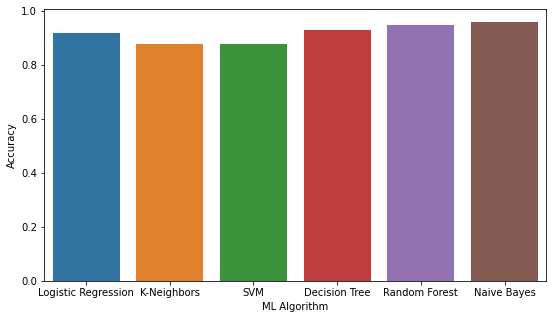

In [35]:
plt.figure(figsize = (9,5))
sns.barplot(x = pd.Series(labels), y = pd.Series(means))
plt.ylabel('Accuracy')
plt.xlabel('ML Algorithm')

In [36]:
df_temp = dict(zip(labels, means))

In [37]:
df_temp

{'Logistic Regression': 0.92,
 'K-Neighbors': 0.88,
 'SVM': 0.88,
 'Decision Tree': 0.93,
 'Random Forest': 0.95,
 'Naive Bayes': 0.96}

In [38]:
#создание датасета с наглядными названиями алгоритмов и их точностью в соотвествии с обобщающей способностью алгоритма 
#(в одну строку)
beauty = pd.DataFrame(df_temp, index=['accuracy'])

In [39]:
#beauty.style.set_table_styles([dict(selector="th",props=[('max-column', '100px')])])

In [40]:
beauty

,Logistic Regression,K-Neighbors,SVM,Decision Tree,Random Forest,Naive Bayes
accuracy,0.92,0.88,0.88,0.93,0.95,0.96


In [41]:
#создание датасета с наглядными названиями алгоритмов и их точностью в соотвествии с обобщающей способностью алгоритма 
#(в виде таблицы)
another_beauty = pd.concat([pd.Series(labels, name='ML Algorithm'), pd.Series(means, name='Accuracy')], axis=1)

In [42]:
another_beauty

,ML Algorithm,Accuracy
0,Logistic Regression,0.92
1,K-Neighbors,0.88
2,SVM,0.88
3,Decision Tree,0.93
4,Random Forest,0.95
5,Naive Bayes,0.96


In [44]:
#выбрать три лучших алгоритма
another_beauty.sort_values('Accuracy', ascending=False).head(3).reset_index(drop=True)

,ML Algorithm,Accuracy
0,Naive Bayes,0.96
1,Random Forest,0.95
2,Decision Tree,0.93


In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
%%time
RandFor = RandomForestClassifier()
parametrs = { 'n_estimators': range (10, 51, 10),
              'max_depth': range (1,13, 2),
              'min_samples_leaf': range (1,8),
              'min_samples_split': range (2,10,2) }
randgrid = GridSearchCV(RandFor, parametrs)
randgrid.fit(X_train, Y_train)
prediction_randgrid = randgrid.predict(X_test)

Wall time: 2min 46s


In [47]:
RandFor = RandomForestClassifier()

In [149]:
#https://vc.ru/ml/147132-kak-avtomaticheski-podobrat-parametry-dlya-modeli-mashinnogo-obucheniya-ispolzuem-gridsearchcv
parametrs = { 'n_estimators': 5,
              'max_depth': 2,
              'min_samples_leaf': 2,
              'min_samples_split': 40 }

In [150]:
randgrid = GridSearchCV(RandFor, parametrs)

ValueError: Parameter grid for parameter (n_estimators) needs to be a list or numpy array, but got (<class 'int'>). Single values need to be wrapped in a list with one element.

In [50]:
%%time
randgrid.fit(X_train, Y_train)
res = randgrid.predict(X_test)

Wall time: 2min 47s


In [ ]:
randgrid.fit(X_train, Y_train)

In [ ]:
randgrid.best_params_

In [56]:
from sklearn import metrics

In [57]:
prediction_randgrid = randgrid.predict(X_test)

In [58]:
#accuracy доля правильно классифицированных объектов
acc_randgrid = metrics.accuracy_score(Y_test, prediction_randgrid)

In [59]:
acc_randgrid

0.972

In [60]:
#precision точность при отнесении объектов к нулевому классу (normal)
prec_randgrid_0 = metrics.precision_score(Y_test, prediction_randgrid, pos_label=0)

In [61]:
prec_randgrid_0

0.9548387096774194

In [62]:
#precision точность при отнесении объектов к первому классу (abnormal)
prec_randgrid_1 = metrics.precision_score(Y_test, prediction_randgrid)

In [63]:
prec_randgrid_1

1.0

In [64]:
#recall полнота
rec_randgrid_0 = metrics.recall_score(Y_test, prediction_randgrid, pos_label=0)
rec_randgrid_1 = metrics.recall_score(Y_test, prediction_randgrid)

In [65]:
rec_randgrid_0

1.0

In [66]:
rec_randgrid_1

0.9313725490196079

In [67]:
#f-score
f_randgrid_0 = metrics.f1_score(Y_test, prediction_randgrid, pos_label=0)
f_randgrid_1 = metrics.f1_score(Y_test, prediction_randgrid)

In [68]:
f_randgrid_0

0.9768976897689768

In [69]:
f_randgrid_1

0.9644670050761421

In [70]:
print(metrics.classification_report(Y_test, prediction_randgrid))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       148
           1       1.00      0.93      0.96       102

    accuracy                           0.97       250
   macro avg       0.98      0.97      0.97       250
weighted avg       0.97      0.97      0.97       250



In [71]:
# support - сколько изначально было объектов в разных классах -> што?
# первые строки - характеристики в разрезе классов
# думаю, что последняя строка - то, во что превратилось avg/total, усредненное значение по метрикам
# я так глянула - можно только эту таблицу взять, она выдает те же результаты, только все вместе

In [72]:
# ROC-кривая нужна для того, чтобы оценить качество модели
# пунктиром задана кривая для классификатора, который предсказывает случайным образом

# сначала нужно получить вероятностные характеристики, стр. 219-220 в книге
randgrid_probabilities = randgrid.predict_proba(X_test)
# затем получить ложноположительные и истинноположительные доли вероятностей
false_positive_rate, true_positive_rate, threshold = metrics.roc_curve(Y_test, randgrid_probabilities[:,1])

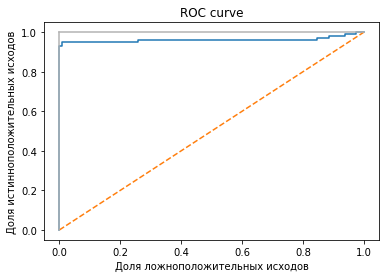

In [73]:
# строим график
plt.title("ROC curve")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7")
plt.plot([1, 1] , c=".7")
plt.ylabel("Доля истинноположительных исходов")
plt.xlabel("Доля ложноположительных исходов")
plt.show()

In [74]:
# просто данные для красивого и правильного ROC
from sklearn.datasets import make_classification
features, target = make_classification(n_samples=10000,
                                       n_features=10,
                                       n_classes=2,
                                       n_informative=3,
                                       random_state=3)
# Разбить на тренировочный и тестовый наборы
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.1, random_state=1)
# Создать логистический регрессионный классификатор
logit = LogisticRegression()
# Натренировать модель
logit.fit(features_train, target_train)
# Получить предсказанные вероятности
target_probabilities = logit.predict_proba(features_test)[:,1]
# Создать доли истинно- и ложноположительных исходов
fpr, tpr, _ = metrics.roc_curve(target_test, target_probabilities)

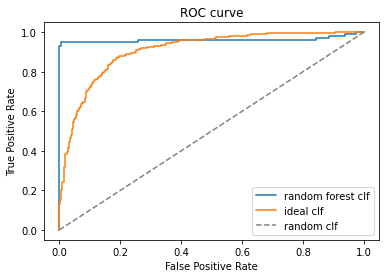

In [75]:
plt.plot(false_positive_rate, true_positive_rate, label='random forest clf')
plt.plot(fpr, tpr, label='ideal clf')
plt.plot([0,1], [0,1], '--', color='grey', label='random clf')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
# https://ru.coursera.org/lecture/supervised-learning/mietriki-kachiestva-sklearn-metrics-f63de

In [76]:
# чтобы количественно оценить качество модели, надо посчитать площадь подкривой
# можно передать как вероятностную классификацию, так и по меткам
# по меткам в рамках группы элементны могут идти в случайном порядке
# вероятностные более упорядоченны
# поэтому значения будут близкими, но все же разными

In [77]:
randfor_roc_auc_labels = metrics.roc_auc_score(Y_test, prediction_randgrid) # метки
randfor_roc_auc_probas = metrics.roc_auc_score(Y_test, randgrid_probabilities[:,1]) # вероятности

In [78]:
randfor_roc_auc_labels

0.9656862745098039

In [79]:
randfor_roc_auc_probas

0.9616454689984102

In [80]:
# логистические потери, чем меньше, тем лучше
rand_log_los = metrics.log_loss(Y_test, prediction_randgrid)

In [81]:
rand_log_los

0.9670857390574998

In [82]:
NaiveBayes = GaussianNB()

In [83]:
parametrs = {}
# Во-первых, GaussianNB принимает только priors в качестве аргумента, поэтому, если у вас нет каких-либо предварительных условий, которые нужно установить для вашей модели заранее, вам нечего будет искать по сетке.
# https://stackoverflow.com/questions/51194627/python-naive-bayes-with-cross-validation-using-gaussiannb-classifier

In [84]:
bayesgrid = GridSearchCV(NaiveBayes, parametrs)

In [86]:
%%time
bayesgrid.fit(X_train, Y_train)
res = bayesgrid.predict(X_test)

Wall time: 22 ms


In [87]:
bayesgrid.fit(X_train, Y_train)

GridSearchCV(estimator=GaussianNB(), param_grid={})

In [88]:
bayesgrid.best_params_

{}

In [89]:
prediction_bayesgrid = bayesgrid.predict(X_test)

In [90]:
#accuracy доля правильно классифицированных объектов
acc_bayesgrid = metrics.accuracy_score(Y_test, prediction_bayesgrid)

In [91]:
acc_bayesgrid

0.96

In [92]:
#precision точность при отнесении объектов к нулевому классу (normal) и первому классу (abnormal)
prec_bayesgrid_0 = metrics.precision_score(Y_test, prediction_bayesgrid, pos_label=0)
prec_bayesgrid_1 = metrics.precision_score(Y_test, prediction_bayesgrid)

In [93]:
prec_bayesgrid_0

0.9367088607594937

In [94]:
prec_bayesgrid_1

1.0

In [95]:
#recall полнота
rec_bayesgrid_0 = metrics.recall_score(Y_test, prediction_bayesgrid, pos_label=0)
rec_bayesgrid_1 = metrics.recall_score(Y_test, prediction_bayesgrid)

In [96]:
rec_bayesgrid_0

1.0

In [97]:
rec_bayesgrid_1

0.9019607843137255

In [98]:
#f-score
f_bayesgrid_0 = metrics.f1_score(Y_test, prediction_bayesgrid, pos_label=0)
f_bayesgrid_1 = metrics.f1_score(Y_test, prediction_bayesgrid)

In [99]:
f_bayesgrid_0

0.9673202614379084

In [100]:
f_bayesgrid_1

0.9484536082474228

In [101]:
print(metrics.classification_report(Y_test, prediction_bayesgrid))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       148
           1       1.00      0.90      0.95       102

    accuracy                           0.96       250
   macro avg       0.97      0.95      0.96       250
weighted avg       0.96      0.96      0.96       250



In [102]:
# ROC-кривая нужна для того, чтобы оценить качество модели

In [103]:
bayesgrid_probabilities = bayesgrid.predict_proba(X_test)

In [104]:
fpr_bayes, tpr_bayes, _ = metrics.roc_curve(Y_test, bayesgrid_probabilities[:,1])

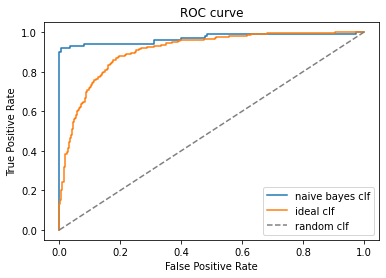

In [105]:
plt.plot(fpr_bayes, tpr_bayes, label='naive bayes clf')
plt.plot(fpr, tpr, label='ideal clf')
plt.plot([0,1], [0,1], '--', color='grey', label='random clf')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')

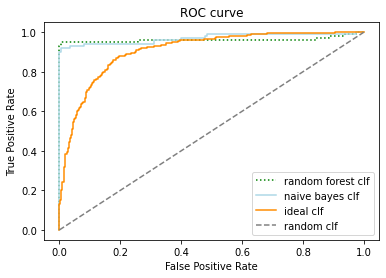

In [106]:
# с предыдущим алгоритмом
plt.plot(false_positive_rate, true_positive_rate, ls=':', label='random forest clf', color='green')
plt.plot(fpr_bayes, tpr_bayes, label='naive bayes clf', color='lightblue')
plt.plot(fpr, tpr, label='ideal clf', color='darkorange')
plt.plot([0,1], [0,1], '--', color='grey', label='random clf')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')

In [107]:
# чтобы количественно оценить качество модели, надо посчитать площадь подкривой
bayes_roc_auc_labels = metrics.roc_auc_score(Y_test, prediction_bayesgrid) # метки
bayes_roc_auc_probas = metrics.roc_auc_score(Y_test, bayesgrid_probabilities[:,1]) # вероятности

In [108]:
bayes_roc_auc_labels

0.9509803921568627

In [109]:
bayes_roc_auc_probas

0.9697270800211977

In [110]:
metrics.roc_auc_score(Y_test, bayesgrid_probabilities[:,1]) # вероятности

0.9697270800211977

In [111]:
# логистические потери, чем меньше, тем лучше
log_los_bayess = metrics.log_loss(Y_test, prediction_randgrid)

In [112]:
log_los_bayess

0.9670857390574998

In [113]:
DesTree = DecisionTreeClassifier()

In [114]:
parametrs = { 'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': range (1, 13, 2),
              'min_samples_leaf': range (1, 8),
              'min_samples_split': range (2, 10, 2),
              'max_features': ['auto', 'sqrt', 'log2']   
}

In [117]:
dtreegrid = GridSearchCV(DesTree, parametrs)

In [118]:
%%time
dtreegrid.fit(X_train, Y_train)
res = dtreegrid.predict(X_test) 

Wall time: 32.4 s


In [119]:
dtreegrid.fit(X_train, Y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 13, 2),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 10, 2),
                         'splitter': ['best', 'random']})

In [120]:
dtreegrid.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 'auto',
 'min_samples_leaf': 6,
 'min_samples_split': 2,
 'splitter': 'best'}

In [121]:
prediction_dtreegrid = dtreegrid.predict(X_test)

In [122]:
#accuracy доля правильно классифицированных объектов
acc_dtreegrid = metrics.accuracy_score(Y_test, prediction_dtreegrid)

In [123]:
acc_dtreegrid

0.924

In [124]:
#precision точность при отнесении объектов к нулевому классу (normal), к первому классу (abnormal)
prec_dtreegrid_0 = metrics.precision_score(Y_test, prediction_dtreegrid, pos_label=0)
prec_dtreegrid_1 = metrics.precision_score(Y_test, prediction_dtreegrid)

In [125]:
prec_dtreegrid_0

0.9056603773584906

In [126]:
prec_dtreegrid_1

0.9560439560439561

In [127]:
#recall полнота
rec_dtreegrid_0 = metrics.recall_score(Y_test, prediction_dtreegrid, pos_label=0)
rec_dtreegrid_1 = metrics.recall_score(Y_test, prediction_dtreegrid)

In [128]:
rec_dtreegrid_0

0.972972972972973

In [129]:
rec_dtreegrid_1

0.8529411764705882

In [130]:
#f-score
f_dtreegrid_0 = metrics.f1_score(Y_test, prediction_dtreegrid, pos_label=0)
f_dtreegrid_1 = metrics.f1_score(Y_test, prediction_dtreegrid)

In [131]:
f_dtreegrid_0 

0.9381107491856677

In [132]:
f_dtreegrid_1

0.9015544041450777

In [133]:
print(metrics.classification_report(Y_test, prediction_dtreegrid))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       148
           1       0.96      0.85      0.90       102

    accuracy                           0.92       250
   macro avg       0.93      0.91      0.92       250
weighted avg       0.93      0.92      0.92       250



In [134]:
# ROC-кривая нужна для того, чтобы оценить качество модели
# пунктиром задана кривая для классификатора, который предсказывает случайным образом

# сначала нужно получить вероятностные характеристики, стр. 219-220 в книге
dtreegrid_probabilities = dtreegrid.predict_proba(X_test)
# затем получить ложноположительные и истинноположительные доли вероятностей
fpr_dtree, tpr_dtree, _ = metrics.roc_curve(Y_test, dtreegrid_probabilities[:,1])

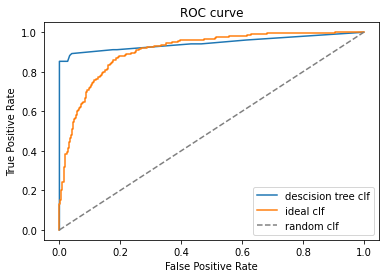

In [135]:
plt.plot(fpr_dtree, tpr_dtree, label='descision tree clf')
plt.plot(fpr, tpr, label='ideal clf')
plt.plot([0,1], [0,1], '--', color='grey', label='random clf')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')

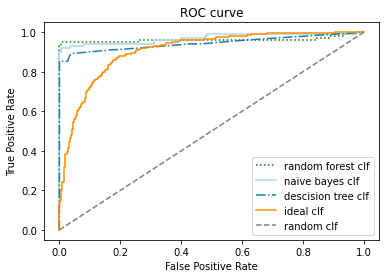

In [136]:
# с предыдущими алгоритмами
plt.plot(false_positive_rate, true_positive_rate, ls=':', label='random forest clf', color='green')
plt.plot(fpr_bayes, tpr_bayes, label='naive bayes clf', color='lightblue')
plt.plot(fpr_dtree, tpr_dtree, label='descision tree clf', ls='-.')
plt.plot(fpr, tpr, label='ideal clf', color='darkorange')
plt.plot([0,1], [0,1], '--', color='grey', label='random clf')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')

In [137]:
# чтобы количественно оценить качество модели, надо посчитать площадь подкривой
dtree_roc_auc_metrics = metrics.roc_auc_score(Y_test, prediction_dtreegrid) # метки
dtree_roc_auc_probas = metrics.roc_auc_score(Y_test, dtreegrid_probabilities[:,1]) # вероятности

In [138]:
dtree_roc_auc_metrics

0.9129570747217808

In [139]:
dtree_roc_auc_probas

0.945217276099629

In [140]:
log_loss_dtree = metrics.log_loss(Y_test, prediction_dtreegrid)

In [141]:
log_loss_dtree

2.6249597995720957

In [142]:
# pd.concat([pd.Series(labels, name='ML Algorithm'), pd.Series(means, name='Accuracy')], axis=1)

In [143]:
# собираем инфу
algorithms = ['Random Forest', 'Naive Bayes', 'Decision Tree']
accurasies = [acc_randgrid, acc_bayesgrid, acc_dtreegrid]
prescisions_0 = [prec_randgrid_0, prec_bayesgrid_0, prec_dtreegrid_0]
prescisions_1 = [prec_randgrid_1, prec_bayesgrid_1, prec_dtreegrid_1]
recalls_0 = [rec_randgrid_0, rec_bayesgrid_0, rec_dtreegrid_0]
recalls_1 = [rec_randgrid_1, rec_bayesgrid_1, rec_dtreegrid_1]
f1s_0 = [f_randgrid_0, f_bayesgrid_0, f_dtreegrid_0]
f1s_1 = [f_randgrid_1, f_bayesgrid_1, f_dtreegrid_1]
roc_auc_labels = [randfor_roc_auc_labels, bayes_roc_auc_labels, dtree_roc_auc_metrics]
roc_auc_probas = [randfor_roc_auc_probas, bayes_roc_auc_probas, dtree_roc_auc_probas]
log_loss = [rand_log_los, log_los_bayess, log_loss_dtree]

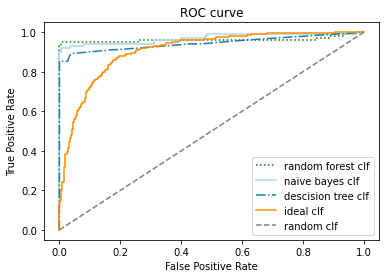

In [144]:
# с предыдущими алгоритмами
# дубль
plt.plot(false_positive_rate, true_positive_rate, ls=':', label='random forest clf', color='green')
plt.plot(fpr_bayes, tpr_bayes, label='naive bayes clf', color='lightblue')
plt.plot(fpr_dtree, tpr_dtree, label='descision tree clf', ls='-.')
plt.plot(fpr, tpr, label='ideal clf', color='darkorange')
plt.plot([0,1], [0,1], '--', color='grey', label='random clf')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')

In [145]:
pd.concat([pd.Series(algorithms, name='ML Algorithm'), 
           pd.Series(accurasies, name='Accuracy'),
           pd.Series(prescisions_0, name='Prescision normal'),
           pd.Series(prescisions_1, name='Prescision abnormal'),
           pd.Series(recalls_0, name='Recall normal'),
           pd.Series(recalls_1, name='Recall abnormal'),
           pd.Series(f1s_0, name='F-score normal'),
           pd.Series(f1s_1, name='F-score abnormal'),
           pd.Series(roc_auc_labels, name='ROC AUC labels'),
           pd.Series(roc_auc_probas, name='ROC AUC probabilities'),
           pd.Series(log_loss, name='Log Loss')
          ], axis=1)

,ML Algorithm,Accuracy,Prescision normal,Prescision abnormal,Recall normal,Recall abnormal,F-score normal,F-score abnormal,ROC AUC labels,ROC AUC probabilities,Log Loss
0,Random Forest,0.972,0.954839,1.000000,1.000000,0.931373,0.976898,0.964467,0.965686,0.961645,0.967086
1,Naive Bayes,0.960,0.936709,1.000000,1.000000,0.901961,0.967320,0.948454,0.950980,0.969727,0.967086
2,Decision Tree,0.924,0.905660,0.956044,0.972973,0.852941,0.938111,0.901554,0.912957,0.945217,2.624960
